# Read wind data

In [2]:
library(tidyverse, warn.conflicts = FALSE)

In [4]:
library(cowplot, warn.conflicts = FALSE)
library(scales, warn.conflicts = FALSE)

# library to read matlab data formats into R
library(reshape2)
library(lubridate)

# set strings as factors to false
options(stringsAsFactors = FALSE)

In [5]:
wind_ds <- read.csv("ERA5_reanalyisis_monthly.csv")

wind_ds$time = parse_date_time(wind_ds$time, orders = "%Y-%m-%d H:M:S")

### add new Date column (month resolution)

In [6]:
wind_ds_monthly <- wind_ds %>%
  mutate(time_month = format(time, format = "%m-%Y"))

In [7]:
wind_ds_monthly$time_month

[1] "12-1978" "01-1979" "01-1979" "02-1979" "02-1979" "03-1979" "03-1979"
  [8] "04-1979" "04-1979" "05-1979" "05-1979" "06-1979" "06-1979" "07-1979"
 [15] "07-1979" "08-1979" "08-1979" "09-1979" "09-1979" "10-1979" "10-1979"
 [22] "11-1979" "11-1979" "12-1979" "12-1979" "01-1980" "01-1980" "02-1980"
 [29] "02-1980" "03-1980" "03-1980" "04-1980" "04-1980" "05-1980" "05-1980"
 [36] "06-1980" "06-1980" "07-1980" "07-1980" "08-1980" "08-1980" "09-1980"
 [43] "09-1980" "10-1980" "10-1980" "11-1980" "11-1980" "12-1980" "12-1980"
 [50] "01-1981" "01-1981" "02-1981" "02-1981" "03-1981" "03-1981" "04-1981"
 [57] "04-1981" "05-1981" "05-1981" "06-1981" "06-1981" "07-1981" "07-1981"
 [64] "08-1981" "08-1981" "09-1981" "09-1981" "10-1981" "10-1981" "11-1981"
 [71] "11-1981" "12-1981" "12-1981" "01-1982" "01-1982" "02-1982" "02-1982"
 [78] "03-1982" "03-1982" "04-1982" "04-1982" "05-1982" "05-1982" "06-1982"
 [85] "06-1982" "07-1982" "07-1982" "08-1982" "08-1982" "09-1982" "09-1982"
 [92] "10-1982" "10-1982" "11-1982" "11-1982" "12-1982" "12-1982" "01-1983"
 [99] "01-1983" "02-1983" "02-1983" "03-1983" "03-1983" "04-1983" "04-1983"
[106] "05-1983" "05-1983" "06-1983" "06-1983" "07-1983" "07-1983" "08-1983"
[113] "08-1983" "09-1983" "09-1983" "10-1983" "10-1983" "11-1983" "11-1983"
[120] "12-1983" "12-1983" "01-1984" "01-1984" "02-1984" "02-1984" "03-1984"
[127] "03-1984" "04-1984" "04-1984" "05-1984" "05-1984" "06-1984" "06-1984"
[134] "07-1984" "07-1984" "08-1984" "08-1984" "09-1984" "09-1984" "10-1984"
[141] "10-1984" "11-1984" "11-1984" "12-1984" "12-1984" "01-1985" "01-1985"
[148] "02-1985" "02-1985" "03-1985" "03-1985" "04-1985" "04-1985" "05-1985"
[155] "05-1985" "06-1985" "06-1985" "07-1985" "07-1985" "08-1985" "08-1985"
[162] "09-1985" "09-1985" "10-1985" "10-1985" "11-1985" "11-1985" "12-1985"
[169] "12-1985" "01-1986" "01-1986" "02-1986" "02-1986" "03-1986" "03-1986"
[176] "04-1986" "04-1986" "05-1986" "05-1986" "06-1986" "06-1986" "07-1986"
[183] "07-1986" "08-1986" "08-1986" "09-1986" "09-1986" "10-1986" "10-1986"
[190] "11-1986" "11-1986" "12-1986" "12-1986" "01-1987" "01-1987" "02-1987"
[197] "02-1987" "03-1987" "03-1987" "04-1987" "04-1987" "05-1987" "05-1987"
[204] "06-1987" "06-1987" "07-1987" "07-1987" "08-1987" "08-1987" "09-1987"
[211] "09-1987" "10-1987" "10-1987" "11-1987" "11-1987" "12-1987" "12-1987"
[218] "01-1988" "01-1988" "02-1988" "02-1988" "03-1988" "03-1988" "04-1988"
[225] "04-1988" "05-1988" "05-1988" "06-1988" "06-1988" "07-1988" "07-1988"
[232] "08-1988" "08-1988" "09-1988" "09-1988" "10-1988" "10-1988" "11-1988"
[239] "11-1988" "12-1988" "12-1988" "01-1989" "01-1989" "02-1989" "02-1989"
[246] "03-1989" "03-1989" "04-1989" "04-1989" "05-1989" "05-1989" "06-1989"
[253] "06-1989" "07-1989" "07-1989" "08-1989" "08-1989" "09-1989" "09-1989"
[260] "10-1989" "10-1989" "11-1989" "11-1989" "12-1989" "12-1989" "01-1990"
[267] "01-1990" "02-1990" "02-1990" "03-1990" "03-1990" "04-1990" "04-1990"
[274] "05-1990" "05-1990" "06-1990" "06-1990" "07-1990" "07-1990" "08-1990"
[281] "08-1990" "09-1990" "09-1990" "10-1990" "10-1990" "11-1990" "11-1990"
[288] "12-1990" "12-1990" "01-1991" "01-1991" "02-1991" "02-1991" "03-1991"
[295] "03-1991" "04-1991" "04-1991" "05-1991" "05-1991" "06-1991" "06-1991"
[302] "07-1991" "07-1991" "08-1991" "08-1991" "09-1991" "09-1991" "10-1991"
[309] "10-1991" "11-1991" "11-1991" "12-1991" "12-1991" "01-1992" "01-1992"
[316] "02-1992" "02-1992" "03-1992" "03-1992" "04-1992" "04-1992" "05-1992"
[323] "05-1992" "06-1992" "06-1992" "07-1992" "07-1992" "08-1992" "08-1992"
[330] "09-1992" "09-1992" "10-1992" "10-1992" "11-1992" "11-1992" "12-1992"
[337] "12-1992" "01-1993" "01-1993" "02-1993" "02-1993" "03-1993" "03-1993"
[344] "04-1993" "04-1993" "05-1993" "05-1993" "06-1993" "06-1993" "07-1993"
[351] "07-1993" "08-1993" "08-1993" "09-1993" "09-1993" "10-1993" "10-1993"
[358] "11-1993" "11-1993" "12-1993" "12-1993" "01-1994" "01-1994" "02-1994"
[365] "02-1994" "03-1994" "03-1994" "04-1994" "04-

# read NISKIN data (from csv)

other datasets:
- PINTDF_integratedChlorophyll.csv
- MLD2EuZ_2.csv
- biogeochembact_dtypes.csv
- niskin_dtypes.csv


In [8]:
niskin_ds <- read.csv("../VeryNEWESTCariacoData/niskin_dtypes.csv")

#niskin_ds$time = parse_date_time(niskin_ds$time, orders = "%Y-%m-%d H:M:S")

In [9]:
#niskin_ds

### add new Date column (month resolution)

In [10]:
niskin_ds_monthly <- niskin_ds %>%
  mutate(time_month = paste(Month,'-', Year, sep=""))

In [11]:
niskin_ds_monthly$time_month

[1] "11-1995" "11-1995" "11-1995" "11-1995" "11-1995" "11-1995" "11-1995"
   [8] "11-1995" "11-1995" "11-1995" "11-1995" "11-1995" "11-1995" "11-1995"
  [15] "11-1995" "11-1995" "11-1995" "11-1995" "11-1995" "12-1995" "12-1995"
  [22] "12-1995" "12-1995" "12-1995" "12-1995" "12-1995" "12-1995" "12-1995"
  [29] "12-1995" "12-1995" "12-1995" "12-1995" "12-1995" "12-1995" "12-1995"
  [36] "12-1995" "12-1995" "12-1995" "1-1996"  "1-1996"  "1-1996"  "1-1996" 
  [43] "1-1996"  "1-1996"  "1-1996"  "1-1996"  "1-1996"  "1-1996"  "1-1996" 
  [50] "1-1996"  "1-1996"  "1-1996"  "1-1996"  "1-1996"  "1-1996"  "1-1996" 
  [57] "1-1996"  "2-1996"  "2-1996"  "2-1996"  "2-1996"  "2-1996"  "2-1996" 
  [64] "2-1996"  "2-1996"  "2-1996"  "2-1996"  "2-1996"  "2-1996"  "2-1996" 
  [71] "2-1996"  "2-1996"  "2-1996"  "2-1996"  "2-1996"  "2-1996"  "3-1996" 
  [78] "3-1996"  "3-1996"  "3-1996"  "3-1996"  "3-1996"  "3-1996"  "3-1996" 
  [85] "3-1996"  "3-1996"  "3-1996"  "3-1996"  "3-1996"  "3-1996"  "3-1996" 
  [92] "3-1996"  "3-1996"  "3-1996"  "3-1996"  "4-1996"  "4-1996"  "4-1996" 
  [99] "4-1996"  "4-1996"  "4-1996"  "4-1996"  "4-1996"  "4-1996"  "4-1996" 
 [106] "4-1996"  "4-1996"  "4-1996"  "4-1996"  "4-1996"  "4-1996"  "4-1996" 
 [113] "4-1996"  "4-1996"  "5-1996"  "5-1996"  "5-1996"  "5-1996"  "5-1996" 
 [120] "5-1996"  "5-1996"  "5-1996"  "5-1996"  "5-1996"  "5-1996"  "5-1996" 
 [127] "5-1996"  "5-1996"  "5-1996"  "5-1996"  "5-1996"  "5-1996"  "5-1996" 
 [134] "6-1996"  "6-1996"  "6-1996"  "6-1996"  "6-1996"  "6-1996"  "6-1996" 
 [141] "6-1996"  "6-1996"  "6-1996"  "6-1996"  "6-1996"  "6-1996"  "6-1996" 
 [148] "6-1996"  "6-1996"  "6-1996"  "6-1996"  "6-1996"  "7-1996"  "7-1996" 
 [155] "7-1996"  "7-1996"  "7-1996"  "7-1996"  "7-1996"  "7-1996"  "7-1996" 
 [162] "7-1996"  "7-1996"  "7-1996"  "7-1996"  "7-1996"  "7-1996"  "7-1996" 
 [169] "7-1996"  "7-1996"  "7-1996"  "7-1996"  "8-1996"  "8-1996"  "8-1996" 
 [176] "8-1996"  "8-1996"  "8-1996"  "8-1996"  "8-1996"  "8-1996"  "8-1996" 
 [183] "8-1996"  "8-1996"  "8-1996"  "8-1996"  "8-1996"  "8-1996"  "8-1996" 
 [190] "8-1996"  "8-1996"  "8-1996"  "9-1996"  "9-1996"  "9-1996"  "9-1996" 
 [197] "9-1996"  "9-1996"  "9-1996"  "9-1996"  "9-1996"  "9-1996"  "9-1996" 
 [204] "9-1996"  "9-1996"  "9-1996"  "9-1996"  "9-1996"  "9-1996"  "9-1996" 
 [211] "9-1996"  "9-1996"  "10-1996" "10-1996" "10-1996" "10-1996" "10-1996"
 [218] "10-1996" "10-1996" "10-1996" "10-1996" "10-1996" "10-1996" "10-1996"
 [225] "10-1996" "10-1996" "10-1996" "10-1996" "10-1996" "10-1996" "10-1996"
 [232] "10-1996" "11-1996" "11-1996" "11-1996" "11-1996" "11-1996" "11-1996"
 [239] "11-1996" "11-1996" "11-1996" "11-1996" "11-1996" "11-1996" "11-1996"
 [246] "11-1996" "11-1996" "11-1996" "11-1996" "11-1996" "11-1996" "11-1996"
 [253] "12-1996" "12-1996" "12-1996" "12-1996" "12-1996" "12-1996" "12-1996"
 [260] "12-1996" "12-1996" "12-1996" "12-1996" "12-1996" "12-1996" "12-1996"
 [267] "12-1996" "12-1996" "12-1996" "12-1996" "12-1996" "12-1996" "1-1997" 
 [274] "1-1997"  "1-1997"  "1-1997"  "1-1997"  "1-1997"  "1-1997"  "1-1997" 
 [281] "1-1997"  "1-1997"  "1-1997"  "1-1997"  "1-1997"  "1-1997"  "1-1997" 
 [288] "1-1997"  "1-1997"  "1-1997"  "1-1997"  "1-1997"  "2-1997"  "2-1997" 
 [295] "2-1997"  "2-1997"  "2-1997"  "2-1997"  "2-1997"  "2-1997"  "2-1997" 
 [302] "2-1997"  "2-1997"  "2-1997"  "2-1997"  "2-1997"  "2-1997"  "2-1997" 
 [309] "2-1997"  "2-1997"  "2-1997"  "2-1997"  "3-1997"  "3-1997"  "3-1997" 
 [316] "3-1997"  "3-1997"  "3-1997"  "3-1997"  "3-1997"  "3-1997"  "3-1997" 
 [323] "3-1997"  "3-1997"  "3-1997"  "3-1997"  "3-1997"  "3-1997"  "3-1997" 
 [330] "3-1997"  "3-1997"  "3-1997"  "4-1997"  "4-1997"  "4-1997"  "4-1997" 
 [337] "4-1997"  "4-1997"  "4-1997"  "4-1997"  "4-1997"  "4-1997"  "4-1997" 
 [344] "4-1997"  "4-1997"  "4-1997"  "4-1997"  "4-1997"  "4-1997"  "4-1997" 
 [351] "4-1997"  "4-1997"  "5-1997"  "5-1997"  "5-1997"  "5-1997"  "5-1997" 
 [358] "5-1997"  "5-1997"  "5-1997"  "5-1997"  "5-1997"  "5-1997"  "5-1997" 

## merge nisking to wind!

In [12]:
# here

ds_wind_niskin <- merge(wind_ds_monthly, niskin_ds_monthly, all=TRUE)

In [23]:
str(niskin_ds)

'data.frame':	4394 obs. of  97 variables:
 $ unlimited                  : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Cruise_number              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Cruise_ID_1                : chr  "93HG_001" "93HG_001" "93HG_001" "93HG_001" ...
 $ Cruise_ID_2                : chr  "CAR-001" "CAR-001" "CAR-001" "CAR-001" ...
 $ Leg                        : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Day                        : int  8 8 8 8 8 8 8 8 8 8 ...
 $ Month                      : int  11 11 11 11 11 11 11 11 11 11 ...
 $ Year                       : int  1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 ...
 $ Latitude                   : num  10.5 10.5 10.5 10.5 10.5 10.5 10.5 10.5 10.5 10.5 ...
 $ Longitude                  : num  -64.7 -64.7 -64.7 -64.7 -64.7 ...
 $ Hydro_cast_no              : num  1 1 1 1 1 1 1 1 3 3 ...
 $ Depth_target               : num  1 7 15 25 35 55 75 100 150 200 ...
 $ Depth_real                 : num  1.5 6.5 15 25 35 ...
 $ O2_ml_L                    : n

In [22]:
str(ds_wind_niskin)

'data.frame':	6381 obs. of  359 variables:
 $ time_month                 : POSIXct, format: "1979-01-01" "1979-01-01" ...
 $ time                       : POSIXct, format: "1979-01-01 00:00:00" "1979-01-31 18:00:00" ...
 $ u100                       : num  -6.81 NA -7.9 NA -6.99 ...
 $ v100                       : num  -3.93 NA -3.67 NA -3.79 ...
 $ u10n                       : num  -5.64 NA -6.69 NA -5.88 ...
 $ u10                        : num  -5.56 NA -6.58 NA -5.77 ...
 $ v10n                       : num  -3.44 NA -3.26 NA -3.37 ...
 $ v10                        : num  -3.38 NA -3.2 NA -3.31 ...
 $ si10                       : num  6.88 NA 7.56 NA 6.92 ...
 $ d2m                        : num  295 NA 295 NA 296 ...
 $ t2m                        : num  297 NA 298 NA 298 ...
 $ p140209                    : num  1.16 NA 1.16 NA 1.16 ...
 $ anor                       : num  0.785 NA 0.785 NA 0.785 ...
 $ isor                       : num  0 NA 0 NA 0 NA 0 NA 0 NA ...
 $ bfi              

In [18]:
ds_wind_niskin$time_month <- parse_date_time(ds_wind_niskin$time_month, orders="%m-%Y")

Warning message:
“Removed 5461 rows containing missing values (geom_point).”


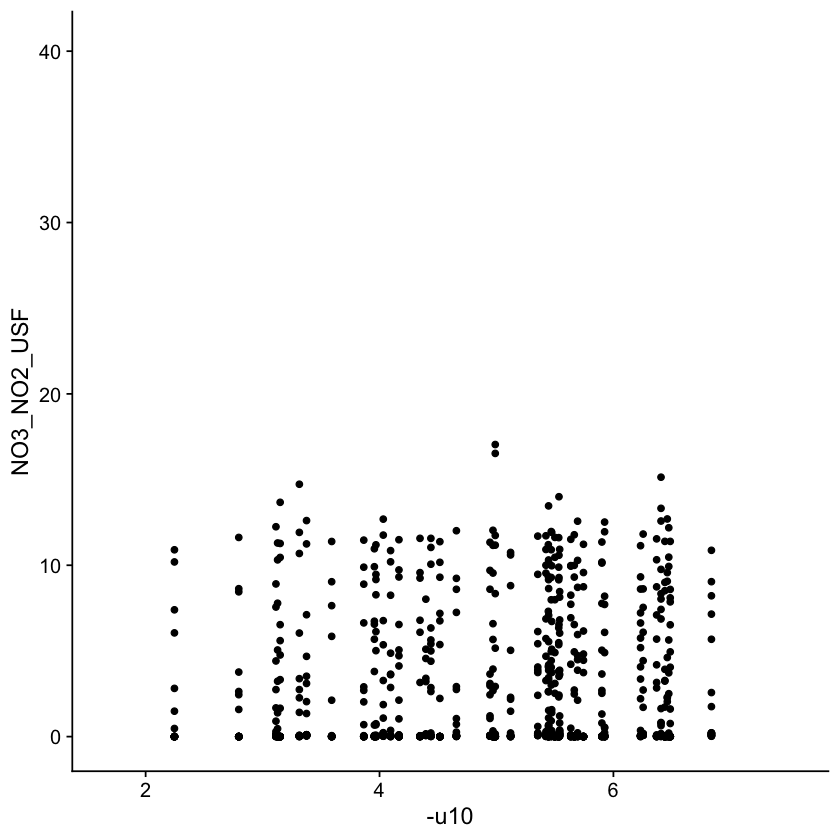

In [31]:
ggplot(data=ds_wind_niskin) + geom_point(aes(x=-u10 ,y=NO3_NO2_USF)) + 
theme_cowplot() #+ geom_smooth(aes(x=-u10 ,y=NO3_NO2_USF))

In [5]:
ds <- read.csv("../VeryNEWESTCariacoData/phytoplankton.csv")

ds$Datetime_UTC = parse_date_time(ds$Datetime_UTC, orders = "%Y-%m-%d H:M:S")
ds$Datetime_local = parse_date_time(ds$Datetime_local, orders = "%Y-%m-%d H:M:S")

ds$date = ds$Datetime_UTC

## now read Functional Group annotated csv

In [6]:
annotated_fg <- read.csv("worms_dat_annotated_OLDFUNCGROUP.csv", sep=";", dec=',', stringsAsFactor=FALSE)
#annotated_fg = annotated_fg[complete.cases(annotated_fg),]

# trim dataframe to relevant columns
AphiaID2FG <- data.frame("AphiaID" = annotated_fg$AphiaID, 
                         "FuncGroup"=as.character(annotated_fg$functionalgroup_old), 
                         stringsAsFactors=FALSE)

## and merge with ds by AphiaID

In [7]:
ds_FG <- merge(ds, AphiaID2FG, all=TRUE)

In [8]:
ds_FG$FuncGroup[ds_FG$ScientificName_accepted == "nanoflagellates"]   <- "NANOFLAGELLATES"
ds_FG$FuncGroup[ds_FG$ScientificName_accepted == "palmelloid colony"] <- "PALMELLOIDCOLONY"

# Now let's plot some raw counts:

Warning message:
“Removed 1 rows containing missing values (geom_point).”

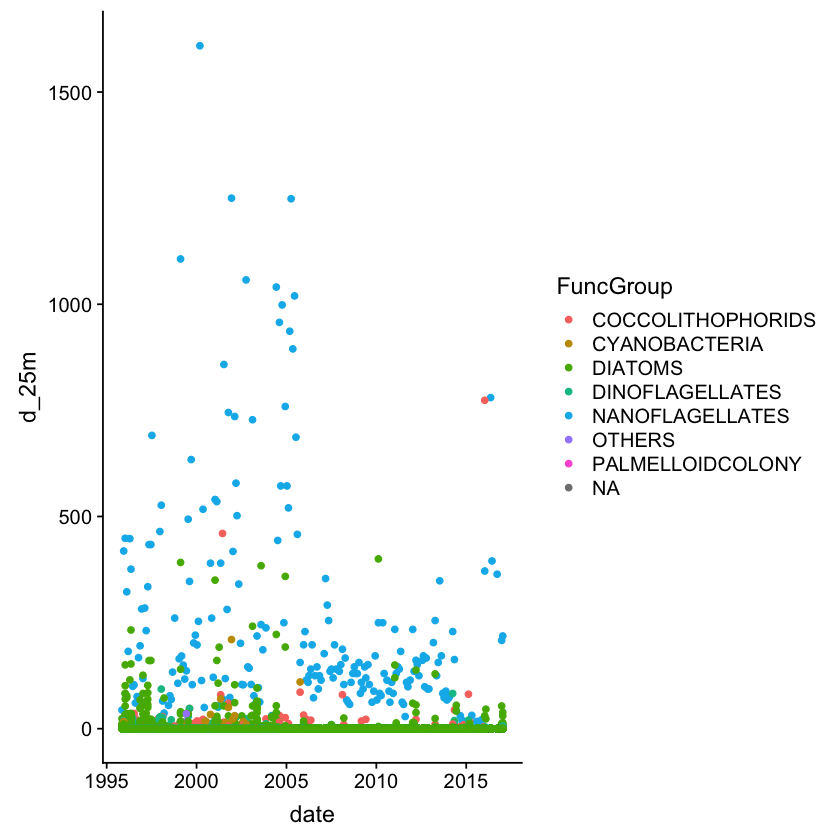

In [9]:
ggplot(data=ds_FG, aes(x=date, y=d_25m, color=FuncGroup)) + geom_point()

# save code: